In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import json, os
import joblib
from itertools import product

import matplotlib.ticker as mticker
import pandas as pd

# EXTRAINDO DADOS

In [56]:
df     = pd.read_csv('../Dataset/model.csv')
TARGET = 'e'
K_CV   = 5
df

,wx,wx(n-1),wx(n-2),wx(n-3),wx(n-4),wx(n-5),wx(n-6),wx(n-7),wx(n-8),wx(n-9),e
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
35295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.0
35296,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
35297,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
35298,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
xData = df.drop(columns=[TARGET])
yData = df[TARGET].values

N_STATES = len(xData.columns)
print('n states: ', N_STATES)

xData

n states:  10


,wx,wx(n-1),wx(n-2),wx(n-3),wx(n-4),wx(n-5),wx(n-6),wx(n-7),wx(n-8),wx(n-9)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
35295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
35296,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0
35297,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
35298,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SELECIONANDO MODELO

In [58]:
from Selector.index import ModelSelector

In [59]:
selector = ModelSelector('gradient_boosting')
model, params = selector.get()
model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0


# APLICANDO GRID SEARCH TEMPORAL

In [60]:
from GridSearch.index import GridSearch

In [ ]:
grid = GridSearch(model, params, xData, yData, K_CV, temporal=True)
grid.update()

model, r2_adj = grid.evaluate()
print('best_R2_Adjusted:', r2_adj)
model

Fitting 5 folds for each of 81 candidates, totalling 405 fits


# AVALIAÇÃO GAUSSIANA
O valor mais provável em uma distribuição gaussiana é a média, com a relação

$$\mu \pm t\cdot\frac{\sigma_a}{\sqrt{n}}$$

- $\sigma_a$ é o desvio padrão amostral, considerando $n-1$ graus de liberade (ddof no numpy)
- $\mu$ é a média
- $t$ é o t_student para corrigir a amostra com $n$-1 e aqui vamos adotar a tabela para 95% de confiança (os dados vão cair em um intervalo $\pm$ ... com 95% de confiança) 

In [ ]:
from Metrics.CrossValidation.index import CrossValidation
from Metrics.GaussianAnalyser.index import GaussianAnalyser

/home/klauss/Projects/DataScience/Motion/Model/Metrics/GaussianAnalyser/index.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  y  = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mu)/sigma)**2)
/home/klauss/Projects/DataScience/Motion/Model/Metrics/GaussianAnalyser/index.py:46: RuntimeWarning: invalid value encountered in divide
  y  = (1/(sigma*np.sqrt(2*np.pi))) * np.exp(-0.5*((x - mu)/sigma)**2)


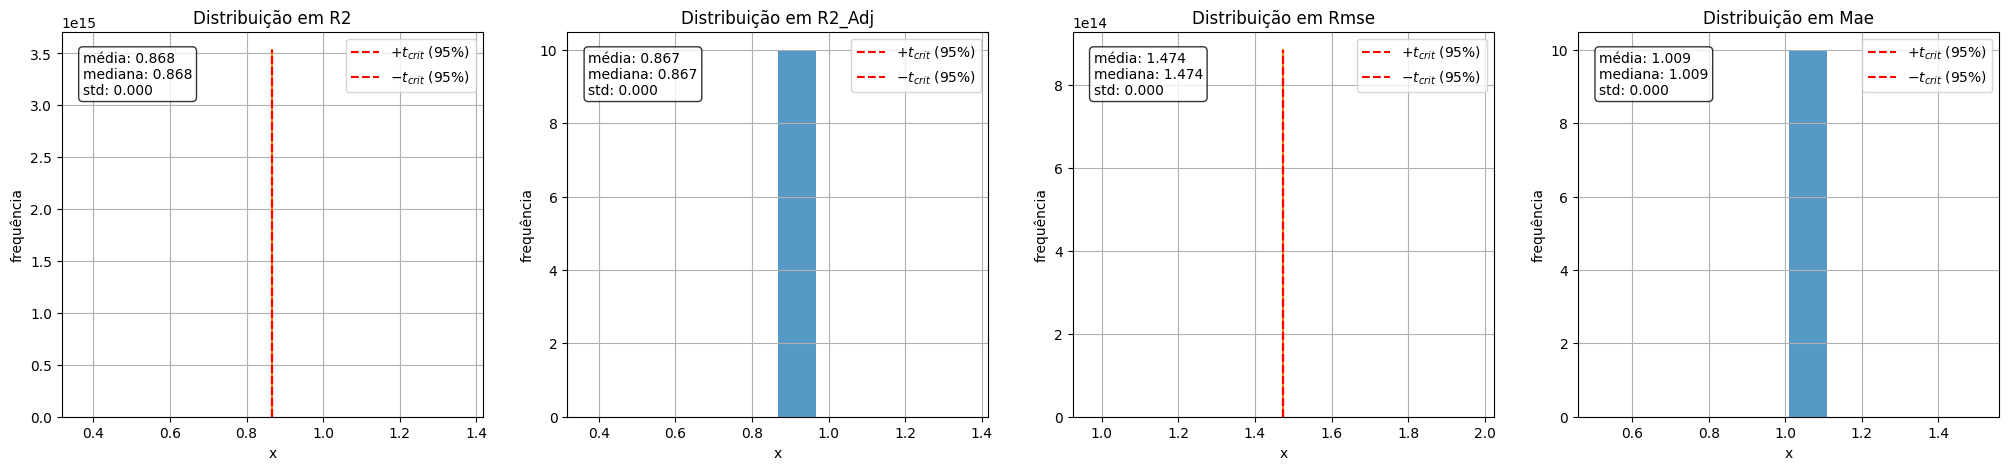

/home/klauss/miniconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


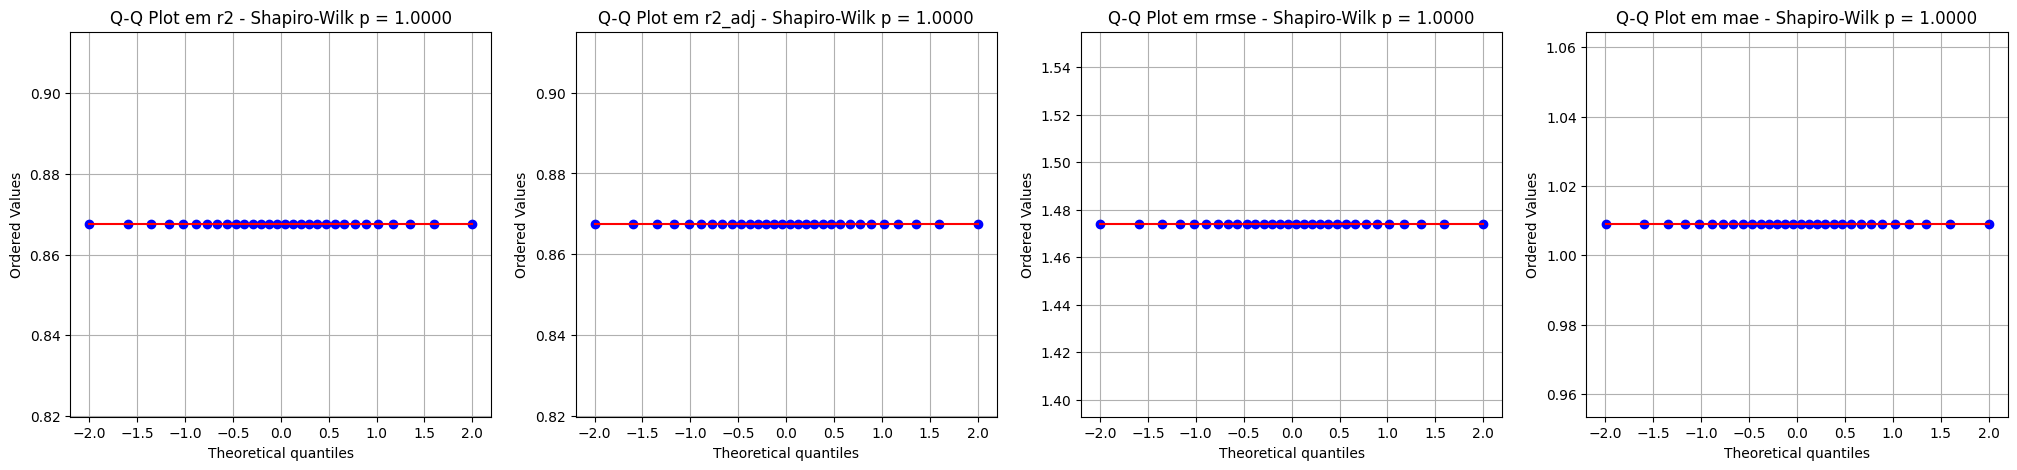

{'r2': 0.8675346871522289,
 'r2_adj': 0.8674219986683089,
 'rmse': 1.4739501117740068,
 'mae': 1.0089813832169336}

In [ ]:
cross    = CrossValidation(model, xData, yData, K_CV, temporal=True)
analyser = GaussianAnalyser(cross)
analyser.update()
analyser.plot()
analyser.info()

# RESULTADOS

In [ ]:
from Metrics.Plotter.index import Plotter

In [ ]:
cross.print()

R2: 0.8675 (±0.0028) [Erro Absoluto]
R2_ADJ: 0.8674 (±0.0028) [Erro Absoluto]
RMSE: 1.4740 (±0.8809) [Erro Absoluto]
MAE: 1.0090 (±0.6465) [Erro Absoluto]


,name,values,mean,std,min,max,split_1,split_2
0,R2,"[0.8703067336677149, 0.8647626406367427]",0.867535,0.002772,0.864763,0.870307,0.870307,0.864763
1,R2_ADJ,"[0.8701964033688359, 0.864647593967782]",0.867422,0.002774,0.864648,0.870196,0.870196,0.864648
2,RMSE,"[2.3548519736460105, 0.5930482499020022]",1.473950,0.880902,0.593048,2.354852,2.354852,0.593048
3,MAE,"[1.655515437794273, 0.36244732863959445]",1.008981,0.646534,0.362447,1.655515,1.655515,0.362447


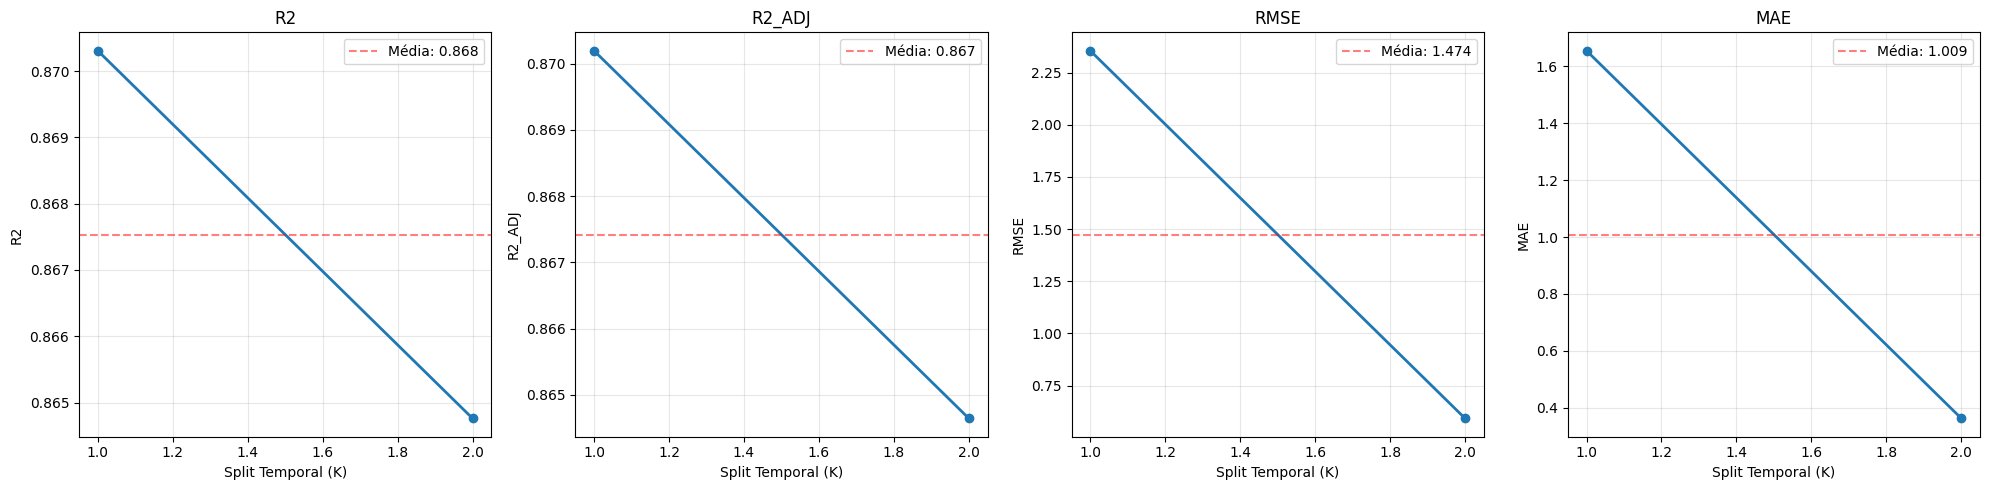

In [ ]:
cross.plot()

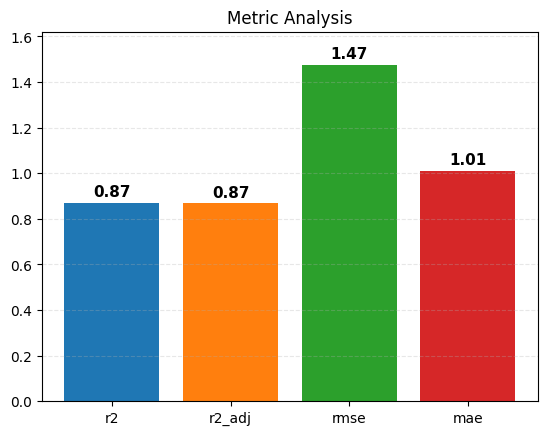

In [ ]:
Plotter(cross.info(), limits=(0, max(list(cross.info().values()))*1.1))

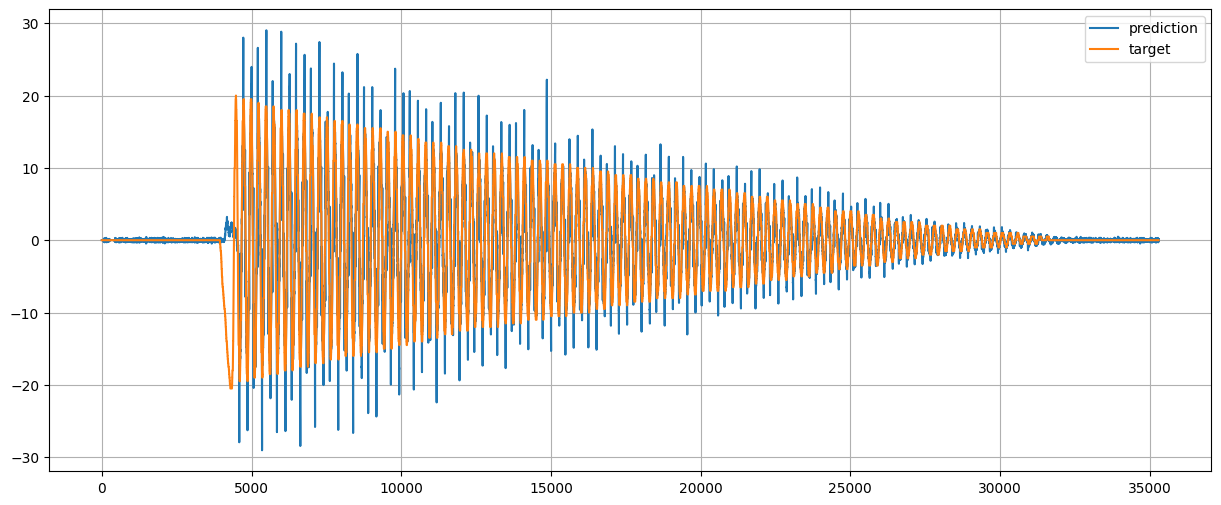

In [ ]:
df['result'] = model.predict(xData) 

plt.figure(figsize=(15, 6))
plt.plot(df.result, label='prediction')
plt.plot(df.e, label='target')
plt.grid(); plt.legend(); plt.show()

# TREINANDO MODELO FINAL

In [ ]:
model.fit(xData, yData)
model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('model', LinearRegression(fit_intercept=False))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'model': LinearRegression(fit_intercept=False),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'model__copy_X': True,
 'model__fit_intercept': False,
 'model__n_jobs': None,
 'model__positive': False,
 'model__tol': 1e-06}

In [ ]:
model

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,False
,copy_X,True
,tol,1e-06
,n_jobs,None


In [ ]:
results = {
    'model': selector.chosen,
    'params': {key: str(value) for key, value in model.get_params().items()},
    'K_CV': K_CV,
    'info': analyser.info(),
    'variables': xData.columns.tolist()
}

display(pd.DataFrame([results.get('info')]))
results

,r2,r2_adj,rmse,mae
0,0.867535,0.867422,1.47395,1.008981


{'model': 'linear_regression',
 'params': {'memory': 'None',
  'steps': "[('scaler', StandardScaler()), ('model', LinearRegression(fit_intercept=False))]",
  'transform_input': 'None',
  'verbose': 'False',
  'scaler': 'StandardScaler()',
  'model': 'LinearRegression(fit_intercept=False)',
  'scaler__copy': 'True',
  'scaler__with_mean': 'True',
  'scaler__with_std': 'True',
  'model__copy_X': 'True',
  'model__fit_intercept': 'False',
  'model__n_jobs': 'None',
  'model__positive': 'False',
  'model__tol': '1e-06'},
 'K_CV': 2,
 'info': {'r2': 0.8675346871522289,
  'r2_adj': 0.8674219986683089,
  'rmse': 1.4739501117740068,
  'mae': 1.0089813832169336},
 'variables': ['wx',
  'wx(n-1)',
  'wx(n-2)',
  'wx(n-3)',
  'wx(n-4)',
  'wx(n-5)',
  'wx(n-6)',
  'wx(n-7)',
  'wx(n-8)',
  'wx(n-9)']}

In [ ]:
os.makedirs('Backup', exist_ok=True)
index  = len(os.listdir('Backup')) + 1

output = f'Backup/model_{index}'
os.makedirs(output, exist_ok=True)

pd.Series(results).to_json(os.path.join(output, 'info.json'), indent=4)
joblib.dump(model, os.path.join(output, 'model.pkl'))

['Backup/model_6/model.pkl']